# Importing Libraries

In [2]:
import cv2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

# Importing dataset

In [4]:
DATA_DIR = r"C:\Users\Sunshine\Downloads\Compressed\training_set\training_set"
CATEGORIES = ["cats", "dogs"]

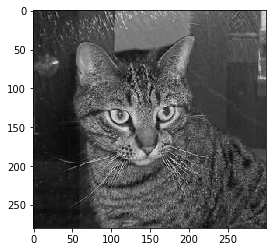

In [5]:
for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap= "gray")
        plt.show()
        break
    break

In [6]:
print(img_array)

[[ 42  42  43 ... 201 196 195]
 [ 43  43  43 ... 197 193 191]
 [ 43  43  43 ... 193 192 192]
 ...
 [ 31  29  25 ...  26  33  49]
 [ 31  29  25 ...  32  36  47]
 [ 31  28  24 ...  41  34  32]]


In [7]:
img_array.shape

(280, 300)

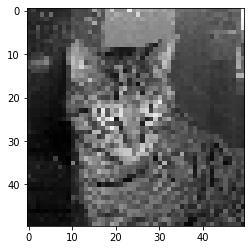

In [8]:
img_size = 50

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [10]:
create_training_data()

In [11]:
print(len(training_data))

8005


In [12]:
import random

random.shuffle(training_data)

In [13]:
for labels in training_data[:10]:
    print(labels[1])

0
1
0
0
0
1
0
0
1
1


In [14]:
X = []
y = []

In [15]:
for features , labels in training_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [16]:
X

array([[[[135],
         [136],
         [137],
         ...,
         [115],
         [116],
         [117]],

        [[137],
         [136],
         [137],
         ...,
         [114],
         [114],
         [117]],

        [[134],
         [136],
         [137],
         ...,
         [113],
         [115],
         [115]],

        ...,

        [[153],
         [153],
         [151],
         ...,
         [177],
         [184],
         [196]],

        [[158],
         [153],
         [153],
         ...,
         [169],
         [186],
         [195]],

        [[156],
         [153],
         [152],
         ...,
         [178],
         [188],
         [200]]],


       [[[ 43],
         [ 32],
         [ 46],
         ...,
         [ 17],
         [ 14],
         [ 13]],

        [[ 40],
         [ 29],
         [ 61],
         ...,
         [ 12],
         [ 15],
         [ 14]],

        [[ 46],
         [ 17],
         [ 38],
         ...,
         [  9],
         [

In [17]:
import pickle

In [18]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [19]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [20]:
X[1]

array([[[ 43],
        [ 32],
        [ 46],
        ...,
        [ 17],
        [ 14],
        [ 13]],

       [[ 40],
        [ 29],
        [ 61],
        ...,
        [ 12],
        [ 15],
        [ 14]],

       [[ 46],
        [ 17],
        [ 38],
        ...,
        [  9],
        [ 13],
        [ 11]],

       ...,

       [[216],
        [127],
        [130],
        ...,
        [192],
        [144],
        [113]],

       [[216],
        [119],
        [132],
        ...,
        [179],
        [114],
        [111]],

       [[237],
        [179],
        [197],
        ...,
        [223],
        [219],
        [228]]], dtype=uint8)

In [21]:
input_sh = X.shape

In [22]:
y = np.array(y)

In [23]:
y.shape

(8005,)

# Making Model

In [24]:
import keras

Using TensorFlow backend.


In [25]:
model = keras.Sequential([
    keras.layers.Conv2D(256, (3,3), strides = (1,1), padding = "valid", input_shape = (50, 50, 1)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "valid"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), strides = (1,1), padding = "valid"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(32, (3,3), strides = (1,1), padding = "valid"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")
])

In [26]:
model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [27]:
model.fit(X, y, epochs = 10)

Epoch 1/10
8005/8005 [==============================] - 160s 20ms/step - loss: 1.7185 - accuracy: 0.5666
Epoch 2/10
8005/8005 [==============================] - 157s 20ms/step - loss: 0.6390 - accuracy: 0.6563
Epoch 3/10
8005/8005 [==============================] - 259s 32ms/step - loss: 0.6177 - accuracy: 0.6816
Epoch 4/10
8005/8005 [==============================] - 156s 20ms/step - loss: 0.5321 - accuracy: 0.7410
Epoch 5/10
8005/8005 [==============================] - 156s 19ms/step - loss: 0.4889 - accuracy: 0.7719
Epoch 6/10
8005/8005 [==============================] - 157s 20ms/step - loss: 0.5038 - accuracy: 0.7668
Epoch 7/10
8005/8005 [==============================] - 206s 26ms/step - loss: 0.4504 - accuracy: 0.7999
Epoch 8/10
8005/8005 [==============================] - 171s 21ms/step - loss: 0.4097 - accuracy: 0.8210
Epoch 9/10
8005/8005 [==============================] - 169s 21ms/step - loss: 0.3720 - accuracy: 0.8396
Epoch 10/10
8005/8005 [==============================] 

In [78]:
loss, accuracy = model.evaluate(X, y)
print("Loss : ",loss)
print("Accuracy : ", accuracy)

8005/8005 [==============================] - ETA:  - 41s 5ms/step
Loss :  0.26034377228740896
Accuracy :  0.8911930322647095


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 256)       2560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 32)         

# Prediction 

In [31]:
y_pred = model.predict(X)

In [32]:
y_pred

array([[0.0269298 ],
       [0.6835117 ],
       [0.63192785],
       ...,
       [0.925935  ],
       [0.00637039],
       [0.8799756 ]], dtype=float32)

In [57]:
y_pred_new = []
for i in range(len(y_pred)):
    if y_pred[i] > 0.50:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)

In [58]:
y_pred_new

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,


In [59]:
y_pred_new[5]

1

# check on new images 0 - Cat, 1 - Dog

In [60]:
img = r"C:\Users\Sunshine\Downloads\datasets\dog.4014.jpg"

In [61]:
img_array_1 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

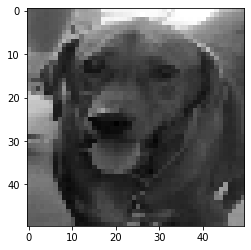

In [62]:
img_array_1 = cv2.resize(img_array_1, (50,50))
plt.imshow(img_array_1, cmap = "gray")
plt.show()

In [63]:
img_array_1 = np.array(img_array_1).reshape(-1, img_size, img_size, 1)

In [64]:
model.predict(img_array_1)

array([[0.5588053]], dtype=float32)

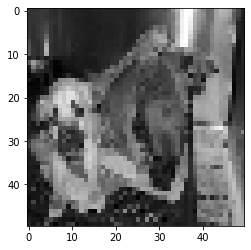

In [67]:
img = r"C:\Users\Sunshine\Downloads\datasets\dog.4057.jpg"
img_array_2 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
img_array_2 = cv2.resize(img_array_2, (50,50))
plt.imshow(img_array_2, cmap = "gray")
plt.show()
img_array_2 = np.array(img_array_2).reshape(-1, img_size, img_size, 1)

In [69]:
if model.predict(img_array_2) > 0.50:
    print(1)
else:
    print(0)

1


In [70]:
model.predict(img_array_2)

array([[0.61856306]], dtype=float32)

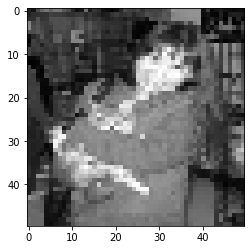

In [71]:
img = r"C:\Users\Sunshine\Downloads\datasets\cat.4190.jpg"
img_array_3 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
img_array_3 = cv2.resize(img_array_3, (50,50))
plt.imshow(img_array_3, cmap = "gray")
plt.show()
img_array_3 = np.array(img_array_3).reshape(-1, img_size, img_size, 1)

In [72]:
if model.predict(img_array_3) > 0.50:
    print(1)
else:
    print(0)

0


In [73]:
model.predict(img_array_3)

array([[0.00833254]], dtype=float32)